In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("Ex5 Data.xlsx")


11.176117611761175


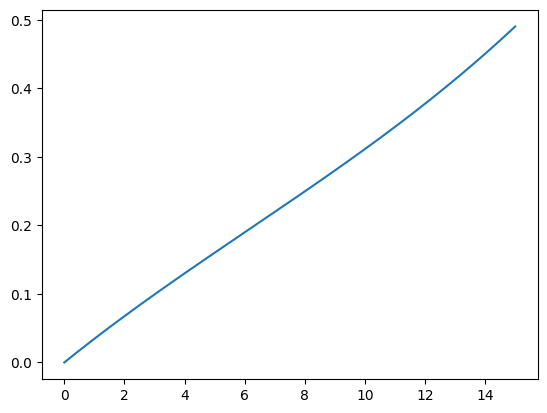

0       168.742746
1       168.658393
2       180.392781
3       188.921769
4       189.849647
          ...     
116    8819.000000
117    9073.500000
118    9313.900000
119    9290.900000
120    9186.700000
Name: Consumption, Length: 121, dtype: float64


In [3]:
def upperSharpeBound(consumption,gamma_v):
    bg = []
    for i in range(len(gamma_v)):
        bound_t = []
        for t in range(len(consumption)-1):
            bound_t.append((consumption[t+1]/consumption[t])**(-gamma_v[i]))

        bg.append(np.std(bound_t,ddof=1))

    return bg


g_v = np.linspace(0,15,10000)
b = upperSharpeBound(data["Consumption"],g_v)
i = 0
for b_g in b:
    if round(b_g,3) >= 0.35:
        print(g_v[i])
        break
    i+=1
plt.plot(g_v,b)
plt.show()

print(data["Consumption"])

In [72]:
diff_t = []
consumption = data["Consumption"]
for t in range(len(consumption)-1):
    diff_t.append(((consumption[t+1]/consumption[t])))

diff_t = np.log(diff_t)
sigma = np.std(diff_t,ddof=1)
mu = np.mean(diff_t)
sigma = 0.015409
mu = 0.0145


def gamma_sol(mu,sigma,beta=0,r=0.02):
    c = np.log((1+r)/(1+beta))
    b = -mu
    a = 0.5*sigma**2
    pos = (-b+np.sqrt(b**2-4*a*c))/(2*a)
    neg = (-b-np.sqrt(b**2-4*a*c))/(2*a)

    return pos,neg




print(gamma_sol(mu,sigma))
gamma = 2
inv = 1/1.02 * np.exp(-gamma*mu+0.5*gamma**2*sigma**2)
print(1/inv-1)
print(gamma_sol(mu,sigma,beta=0.02,r=1/inv-1))

(120.75619668322406, 1.3813205502216823)
0.049514580233460004
(120.13751723344575, 1.9999999999999944)


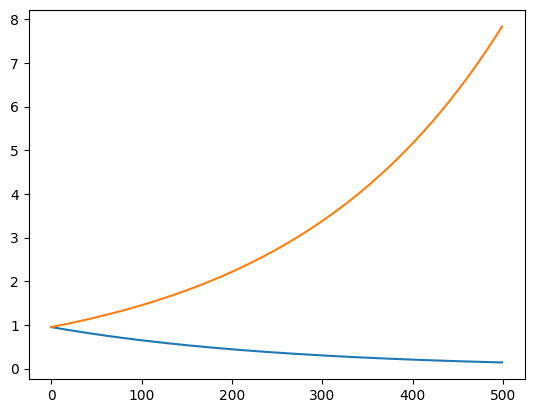

In [76]:
gamma_vec = np.linspace(0,20,500)
pos,neg = 20/21*(1+0.1)**(-gamma_vec), 20/21*(1-0.1)**(-gamma_vec)

plt.plot(pos)
plt.plot(neg)

49.99868963834315


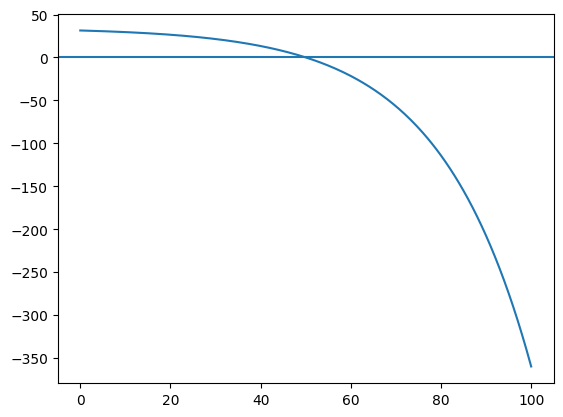

In [90]:
t = np.linspace(0,100,301)
y_t = 34.4-3*(1.05)**t

plt.plot(t,y_t)
plt.axhline(y=0)
print(np.log(34.4/3)/np.log(1.05))
plt.show()